In [1]:
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import ultralytics
from PIL import Image
import random
import torch


In [2]:
ultralytics.checks()

Ultralytics YOLOv8.2.98 🚀 Python-3.10.14 torch-2.4.1+cu121 CPU (Intel Core(TM) i7-6700HQ 2.60GHz)
Setup complete ✅ (8 CPUs, 23.4 GB RAM, 114.0/121.0 GB disk)


In [3]:
print("GPU available:", torch.cuda.is_available())

GPU available: False


# Preprocesamiento de datos

In [15]:
root_path = "datasets/archive/rsud20k"

In [16]:
train_image = [image for image in os.listdir(f"{root_path}/images/train")]

In [17]:
train_image_number = len(train_image)

In [18]:
print(f"El número total de imágenes de entrenamiento es: {train_image_number}")

El número total de imágenes de entrenamiento es: 18681


In [20]:
image_path = f"{root_path}/images"

train_images_path = f"{image_path}/train"
val_images_path = f"{image_path}/val"
test_images_path = f"{image_path}/test"

In [10]:
image_path = [os.path.join(train_images_path, image) for image in train_image]

In [11]:
image_path

['datasets/archive/rsud20k/images/train/train13651.jpg',
 'datasets/archive/rsud20k/images/train/train18270.jpg',
 'datasets/archive/rsud20k/images/train/train757.jpg',
 'datasets/archive/rsud20k/images/train/train16019.jpg',
 'datasets/archive/rsud20k/images/train/train17309.jpg',
 'datasets/archive/rsud20k/images/train/train15782.jpg',
 'datasets/archive/rsud20k/images/train/train563.jpg',
 'datasets/archive/rsud20k/images/train/train2082.jpg',
 'datasets/archive/rsud20k/images/train/train16340.jpg',
 'datasets/archive/rsud20k/images/train/train7709.jpg',
 'datasets/archive/rsud20k/images/train/train3656.jpg',
 'datasets/archive/rsud20k/images/train/train12022.jpg',
 'datasets/archive/rsud20k/images/train/train2543.jpg',
 'datasets/archive/rsud20k/images/train/train9356.jpg',
 'datasets/archive/rsud20k/images/train/train10621.jpg',
 'datasets/archive/rsud20k/images/train/train2448.jpg',
 'datasets/archive/rsud20k/images/train/train4445.jpg',
 'datasets/archive/rsud20k/images/train/tr

In [12]:
image_path[0:9]

['datasets/archive/rsud20k/images/train/train13651.jpg',
 'datasets/archive/rsud20k/images/train/train18270.jpg',
 'datasets/archive/rsud20k/images/train/train757.jpg',
 'datasets/archive/rsud20k/images/train/train16019.jpg',
 'datasets/archive/rsud20k/images/train/train17309.jpg',
 'datasets/archive/rsud20k/images/train/train15782.jpg',
 'datasets/archive/rsud20k/images/train/train563.jpg',
 'datasets/archive/rsud20k/images/train/train2082.jpg',
 'datasets/archive/rsud20k/images/train/train16340.jpg']

## Muestra de los datos

In [5]:

def show_img_matrix(image_list, show_axis=False):
  max_size = 9
  if len(image_list) != max_size:
    return

  plt.figure(figsize=(15, 15))

  for i in range(max_size):
    img_file = image_list[i]
    img_name = os.path.basename(img_file)
    ax = plt.subplot(3, 3, i + 1)
    if os.path.exists(img_file) == True:
      plt.imshow(np.asarray(Image.open(img_file)))
      img = mpimg.imread(img_file)
    #Como los nombres son muy extensos, vamos a truncar a 20 caracteres.
    plt.title(img_name[:20])
    plt.axis("on" if show_axis == True else "on")

  plt.tight_layout()
  plt.show()

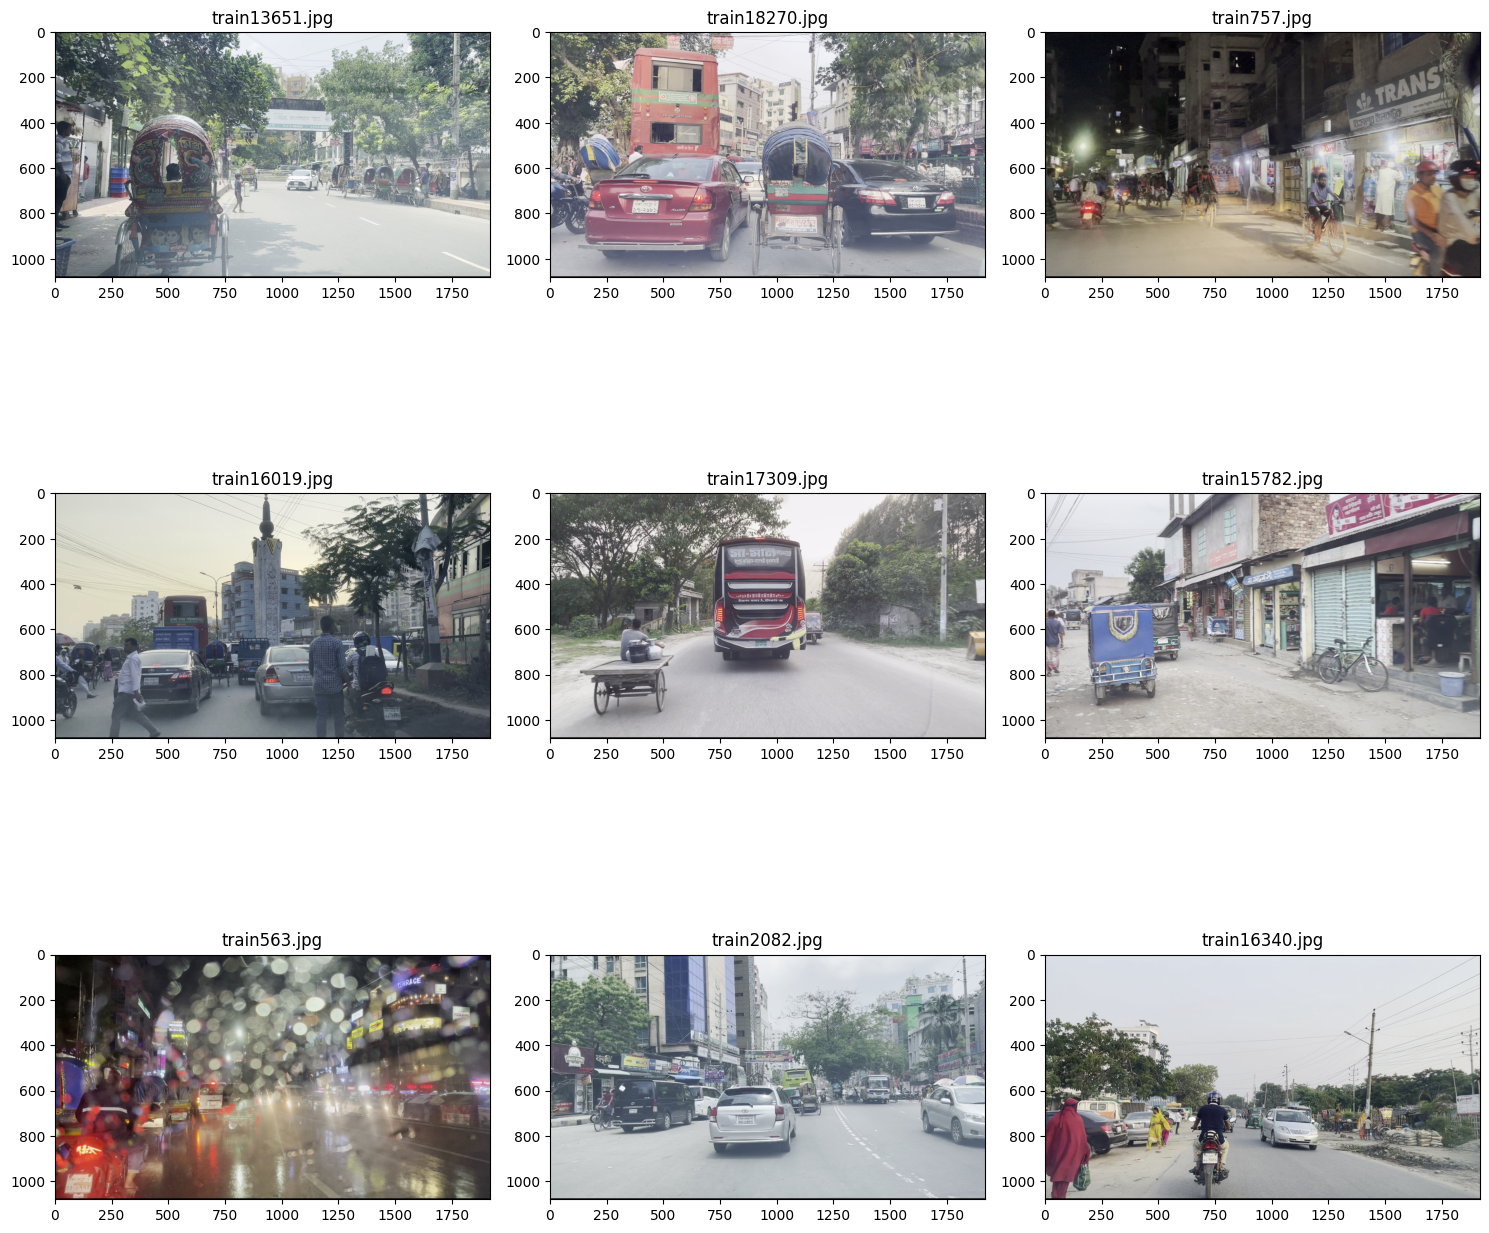

In [22]:
show_img_matrix(image_path[0:9], show_axis=True)

In [12]:


class_names = [
    "person",
    "rickshaw",
    "rickshaw van",
    "auto rickshaw",
    "truck",
    "pickup truck",
    "private car",
    "motorcycle",
    "bicycle",
    "bus",
    "micro bus",
    "covered van",
    "human hauler"
]

In [14]:
root_path = "archive/rsud20k"

In [44]:
yml_content = f"""\
path: {root_path}   # Directorio raiz de los datos
train: images/{os.path.basename(train_images_path)}  # Ruta relativa a los datos de entrenamiento
val: images/{os.path.basename(val_images_path)}  # Ruta relativa a los datos de validacion
test: images/{os.path.basename(train_images_path)} # Ruta relativa a los datos de prueba

# Classes
nc: {len(class_names)}

names: {class_names}
"""

In [37]:
os.path.basename(train_images_path)

'train'

In [4]:
yml_path = f"datasets/archive/rsud20k/rsud20k.yaml"

In [46]:
root_path

'archive/rsud20k'

In [47]:

if os.path.exists(yml_path):
  os.remove(yml_path)

# Guardar el archivo YAML
with open(yml_path, 'w') as yaml_file:
  yaml_file.write(yml_content)

# Entrenamiento del modelo

Se utilizará un modelo pre-entrenado Yolov8 (You Only Look Once). Como su nombre lo indica, al analizar una única vez ada imagen, Yolo tiene una menor cantidad de parámetros lo que lo hace eficiente en el uso de recursos computaciones, además, puede ser entrenado de manera más rápida que otros modelos, esto debido a su última capa convolucional completamente conectada cuya salida es una imágen de un solo pixel. En este caso se utilizará la versión 8 lanzada en 2023.

In [6]:
model = ultralytics.YOLO('yolov8n.yaml')
model = ultralytics.YOLO('yolov8n.pt')

In [10]:
img_size = 384

In [7]:
model.train(data=yml_path, epochs=15, imgsz=img_size, batch=150, patience=2, name="train")

New https://pypi.org/project/ultralytics/8.3.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.98 🚀 Python-3.10.14 torch-2.4.1+cu121 CPU (Intel Core(TM) i7-6700HQ 2.60GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets/archive/rsud20k/rsud20k.yaml, epochs=15, time=None, patience=2, batch=150, imgsz=384, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train27, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

train: Scanning /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/labels/train.cache... 18681 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18681/18681 [00:00<?, ?it/s]
/home/emil/anaconda3/envs/deep_learning/lib/python3.10/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
val: Scanning /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/labels/val.cache... 1004 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1004/1004 [00:00<?, ?it/s]


Plotting labels to runs/detect/train27/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001171875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 384 train, 384 val
Using 0 dataloader workers
Logging results to runs/detect/train27
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15         0G      1.425      2.749      1.078        994        384: 100%|██████████| 125/125 [43:12<00:00, 20.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:44<00:00, 11.23s/it]

                   all       1004       7385      0.546      0.258      0.294      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15         0G      1.175      1.205          1       1064        384: 100%|██████████| 125/125 [42:07<00:00, 20.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.46s/it]

                   all       1004       7385      0.505      0.399      0.417      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15         0G       1.12      1.042      0.986       1036        384: 100%|██████████| 125/125 [42:41<00:00, 20.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:46<00:00, 11.58s/it]

                   all       1004       7385      0.521      0.406      0.446      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15         0G      1.085     0.9568     0.9764       1016        384: 100%|██████████| 125/125 [43:57<00:00, 21.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:44<00:00, 11.21s/it]

                   all       1004       7385      0.566      0.441      0.471      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15         0G       1.05     0.8951     0.9652       1059        384: 100%|██████████| 125/125 [43:29<00:00, 20.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:43<00:00, 10.79s/it]

                   all       1004       7385      0.568       0.47      0.495      0.349


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15         0G      1.007     0.8251     0.9406        493        384: 100%|██████████| 125/125 [40:56<00:00, 19.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.23s/it]

                   all       1004       7385      0.593      0.463      0.504      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15         0G      0.978     0.7648     0.9304        503        384: 100%|██████████| 125/125 [41:14<00:00, 19.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:42<00:00, 10.62s/it]

                   all       1004       7385       0.56       0.49      0.518      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15         0G      0.952     0.7227      0.922        505        384: 100%|██████████| 125/125 [41:24<00:00, 19.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.33s/it]

                   all       1004       7385       0.64      0.469      0.538      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15         0G     0.9347     0.6942     0.9181        499        384: 100%|██████████| 125/125 [41:16<00:00, 19.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.25s/it]

                   all       1004       7385      0.621      0.473      0.534      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15         0G     0.9172     0.6698     0.9137        535        384: 100%|██████████| 125/125 [40:33<00:00, 19.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.23s/it]

                   all       1004       7385       0.68      0.477      0.551      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15         0G     0.8995     0.6483     0.9071        460        384: 100%|██████████| 125/125 [40:19<00:00, 19.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.21s/it]

                   all       1004       7385      0.675      0.461       0.55      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15         0G     0.8838     0.6299     0.9024        478        384: 100%|██████████| 125/125 [40:17<00:00, 19.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:42<00:00, 10.52s/it]

                   all       1004       7385      0.681      0.459      0.549      0.396
EarlyStopping: Training stopped early as no improvement observed in last 2 epochs. Best results observed at epoch 10, best model saved as best.pt.
To update EarlyStopping(patience=2) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



12 epochs completed in 8.505 hours.
Optimizer stripped from runs/detect/train27/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train27/weights/best.pt, 6.2MB

Validating runs/detect/train27/weights/best.pt...
Ultralytics YOLOv8.2.98 🚀 Python-3.10.14 torch-2.4.1+cu121 CPU (Intel Core(TM) i7-6700HQ 2.60GHz)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.53s/it]


                   all       1004       7385       0.68      0.476      0.551      0.398
                person        566       1917      0.799      0.476      0.617      0.355
              rickshaw        648       1587      0.666      0.713      0.757      0.552
          rickshaw van        160        240      0.457      0.393      0.385      0.181
         auto rickshaw        388        590       0.75      0.711      0.782      0.612
                 truck         62         65      0.502      0.543      0.593       0.48
          pickup truck         66         74      0.473       0.34      0.374       0.25
           private car        776       1420      0.779      0.735       0.79       0.59
            motorcycle        550        860      0.648      0.633      0.667      0.438
               bicycle        135        146      0.596      0.178      0.253      0.154
                   bus        169        182      0.887      0.423      0.607      0.459
             micro bu

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x75d5f9ee4e80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

# Análisis de predicciones

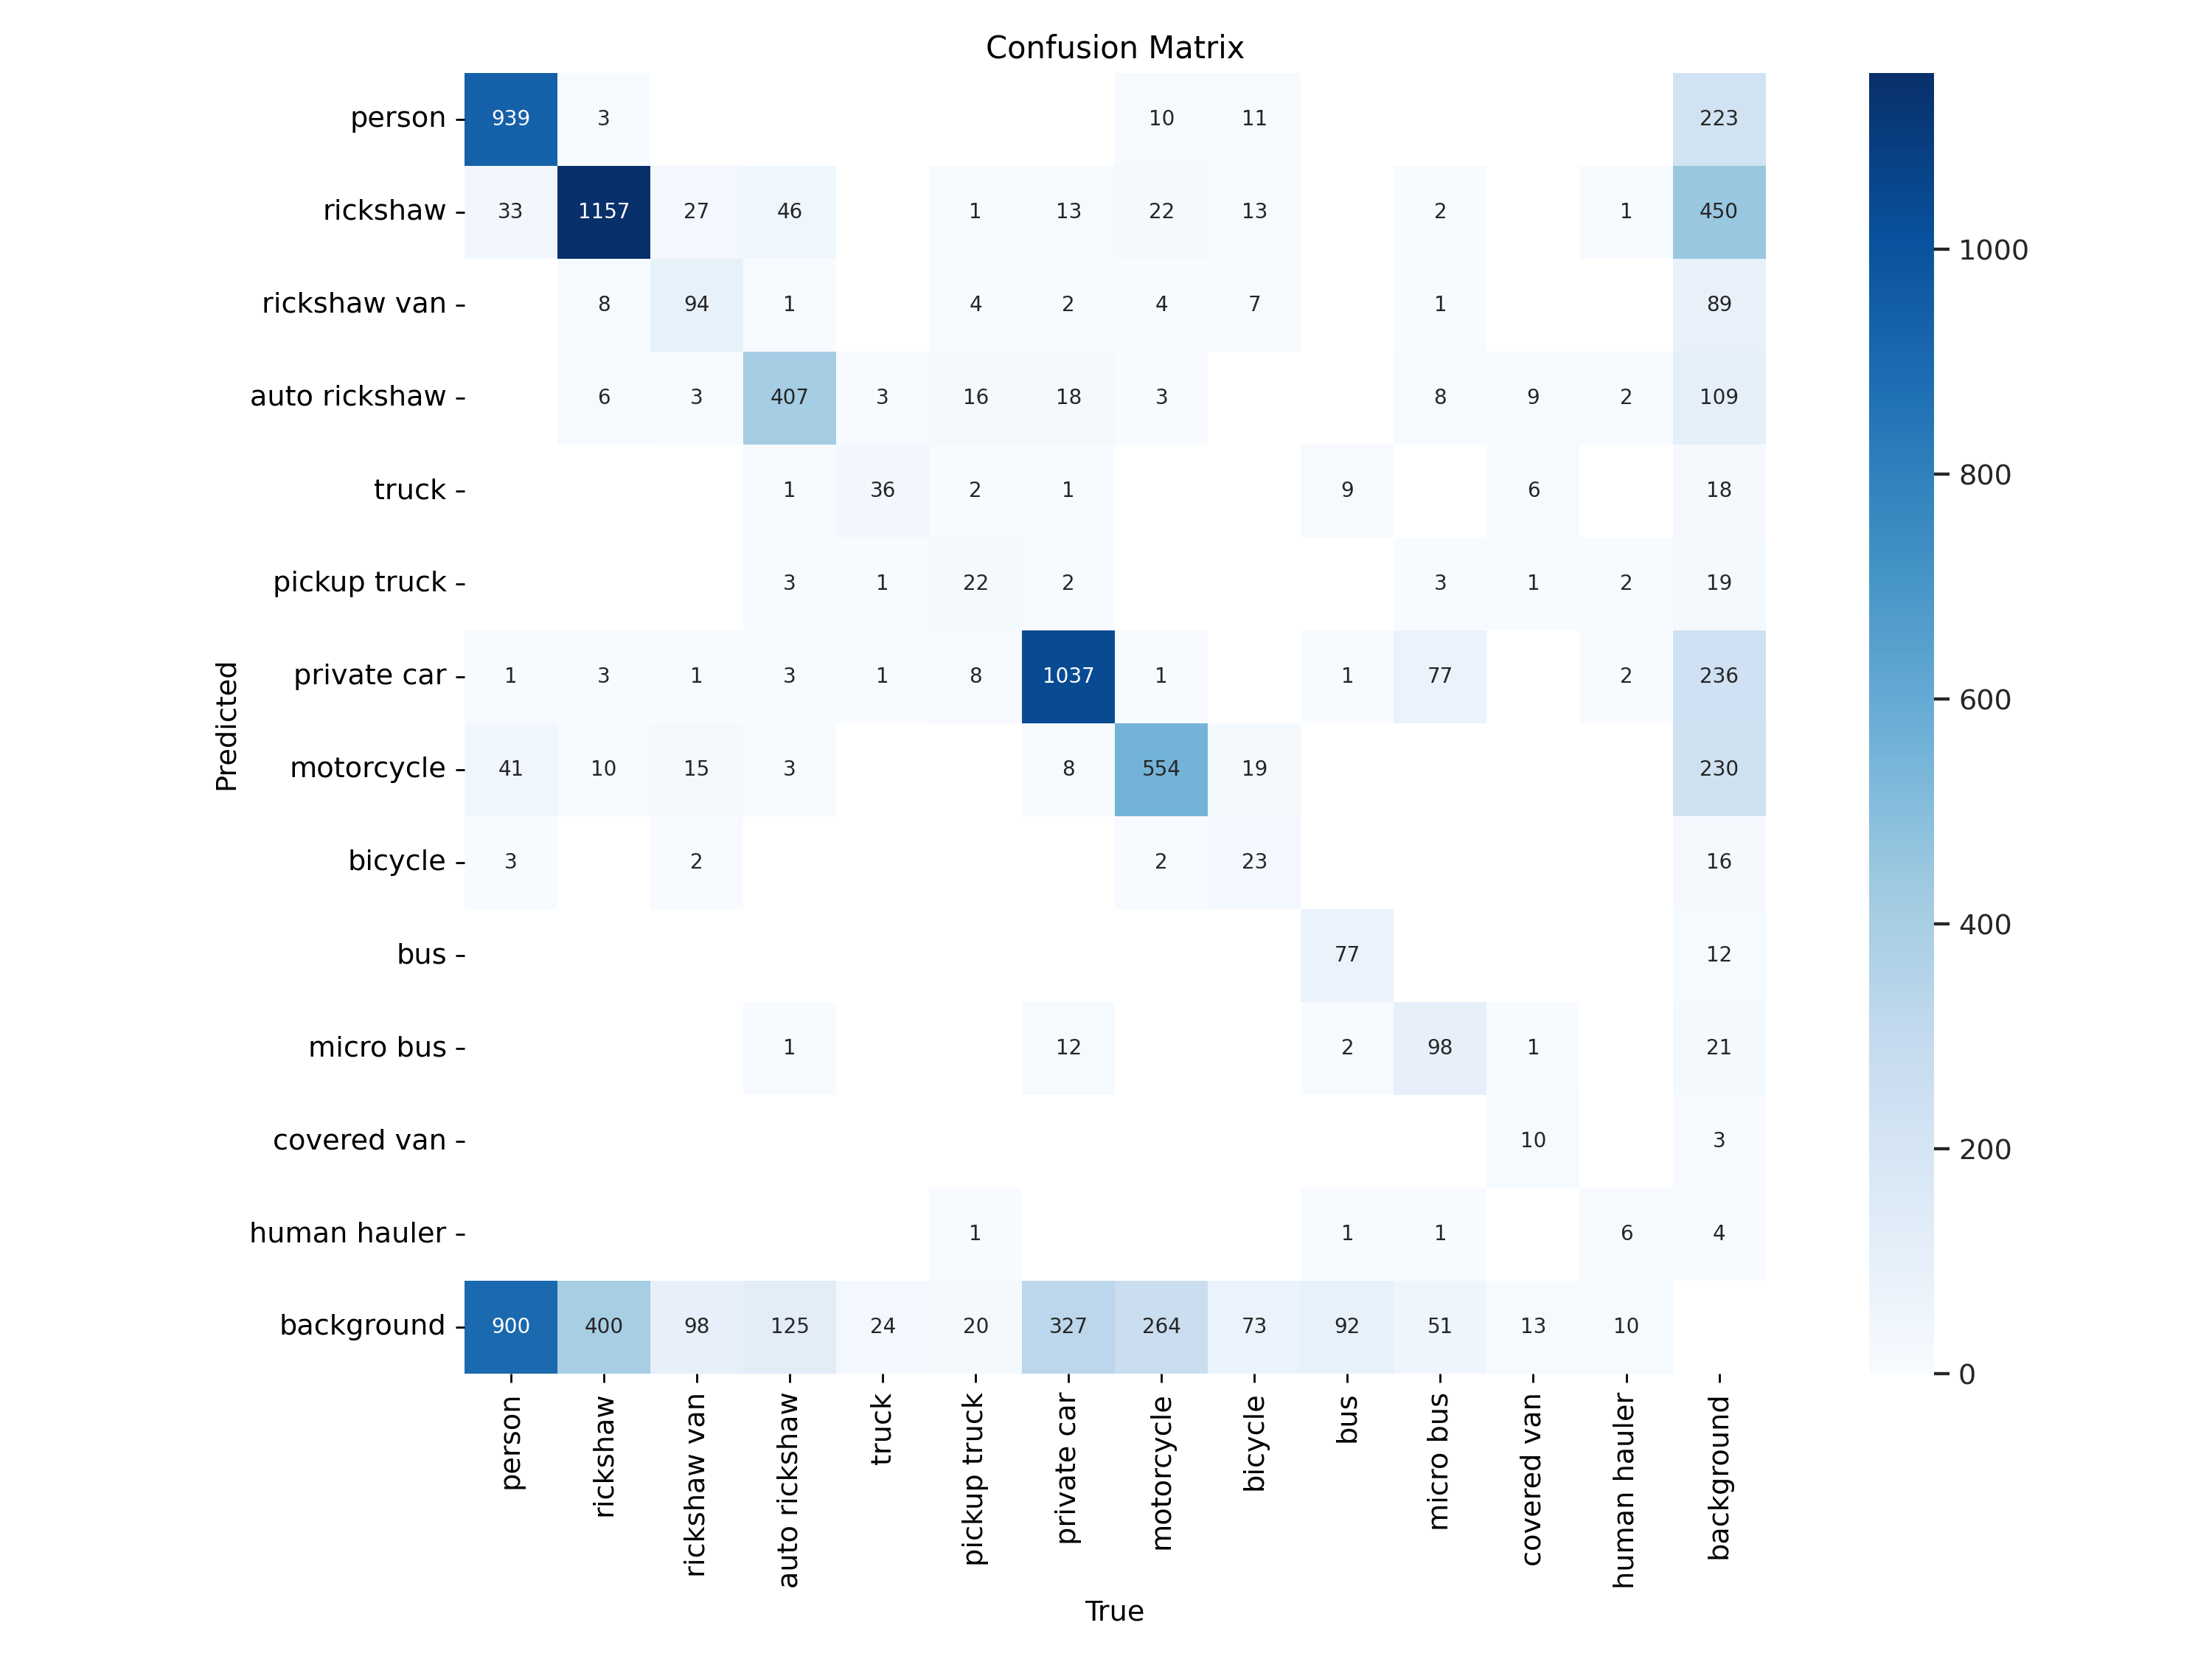

In [8]:
Image.open("runs/detect/train27/confusion_matrix.png")

En la matriz de confusión se observa que el modelo tiene un desempeño adecuado, por ejemplo para la categoría bus, se generan 77 verdaeros positivos y 12 falsos positivos (El modelo los confunde con background). Para la categoría persona, se tienen 939 verdaderos positivos y 247 falsos positivos.

## Validation set

In [11]:
results = model.val(data=yml_path, imgsz=img_size, name="val")

Ultralytics YOLOv8.2.98 🚀 Python-3.10.14 torch-2.4.1+cu121 CPU (Intel Core(TM) i7-6700HQ 2.60GHz)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/labels/val.cache... 1004 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1004/1004 [00:00<?, ?it/s]
/home/emil/anaconda3/envs/deep_learning/lib/python3.10/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:42<00:00,  6.02s/it]


                   all       1004       7385       0.68      0.476      0.551      0.398
                person        566       1917      0.799      0.476      0.617      0.355
              rickshaw        648       1587      0.666      0.713      0.757      0.552
          rickshaw van        160        240      0.457      0.393      0.385      0.181
         auto rickshaw        388        590       0.75      0.711      0.782      0.612
                 truck         62         65      0.502      0.543      0.593       0.48
          pickup truck         66         74      0.473       0.34      0.374       0.25
           private car        776       1420      0.779      0.735       0.79       0.59
            motorcycle        550        860      0.648      0.633      0.667      0.438
               bicycle        135        146      0.596      0.178      0.253      0.154
                   bus        169        182      0.887      0.423      0.607      0.459
             micro bu

# Predicciones

In [21]:
results = model.predict(source=test_images_path, conf=0.25, save=True, imgsz=img_size, name="predict")

image 1/649 /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/images/test/test0.jpg: 224x384 2 rickshaws, 1 rickshaw van, 1 auto rickshaw, 1 private car, 1 motorcycle, 171.6ms
image 2/649 /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/images/test/test1.jpg: 224x384 3 rickshaws, 1 truck, 2 motorcycles, 1 bus, 289.7ms
image 3/649 /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/images/test/test10.jpg: 224x384 1 rickshaw, 2 motorcycles, 357.5ms
image 4/649 /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/images/test/test100.jpg: 224x384 1 truck, 2 private cars, 1 bus, 53.5ms
image 5/649 /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/images/test/test101.jpg: 224x384 3 private cars, 1 motorcycle, 59.8ms
image 6/649 /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/images/test/test102.jpg: 224x384 4 private cars, 1 bus, 47.5ms
image 7/649 /home/emil/Docu

In [6]:
predict_path = "runs/detect/predict2"

In [7]:
img_test = [filename for filename in os.listdir(predict_path)]
img_test_count = len(img_test)
print(f"El número total de imágenes es: {img_test_count}")

El número total de imágenes es: 649


In [8]:
img_test = [os.path.join(predict_path, filename) for filename in img_test]

In [9]:
random.shuffle(img_test)

## Veamos el desempeño general delmodelo

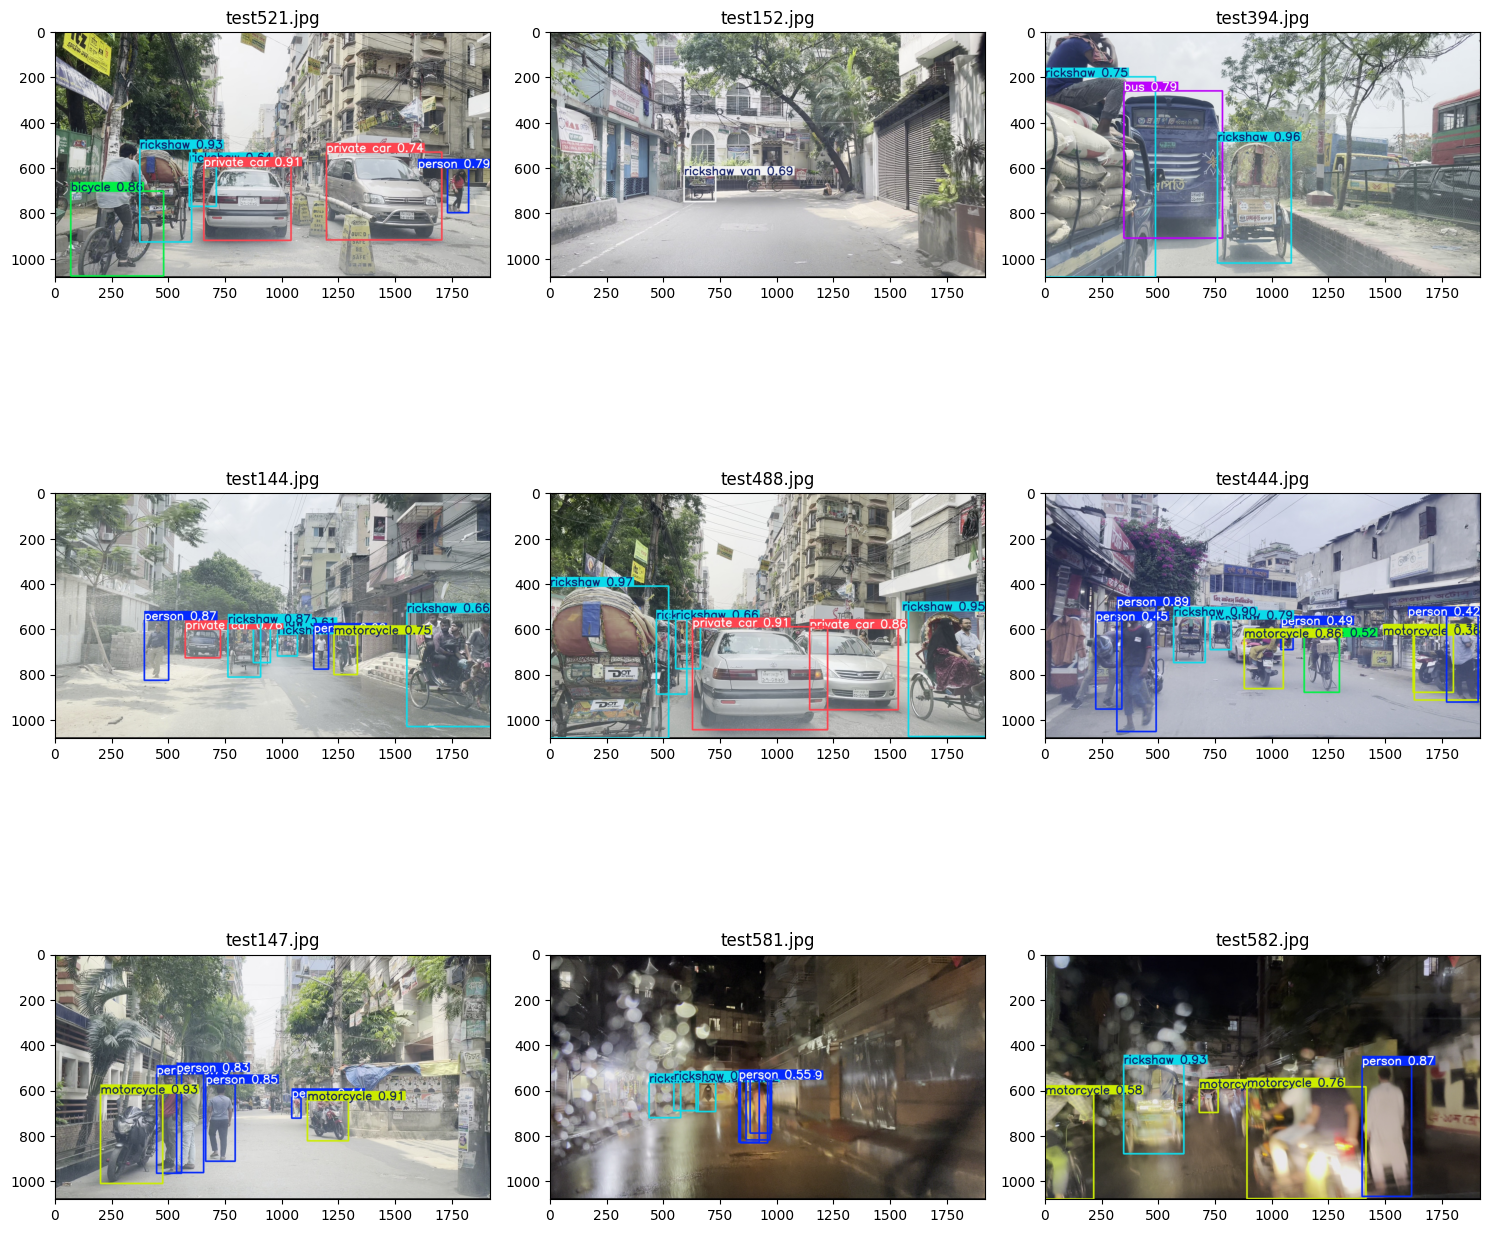

In [10]:
show_img_matrix(img_test[0:9], show_axis=True)

Se observa que en algunos cass como en laimagen test147.jpg, el modelo es capaz de generalizar de manera precisa y correcta a cuatro personas y dos motocicletas. De la misma manera, el modelo es capaz de identificar de manera correcta en la imagen test488.jpg dos carros particulares, y tres rickshaw. Incluso en una imagen borrosa como la test582.jpg, se observa que el modelo es capaz de identificar de manera correcta una persona, tres motocicletas y un rickshaw.

# Métrica mAP

La métrica Mean Average Precision o mAP permite identificar un buen modelo basado en las métricas precisian y recall.

Dado un valor umbral de IoU (Intersection over the union) que permite cuantificar el porcentaje en el cual el área de la Bounding Box (BB) predich intersecta con la real, es posible calcular las métricas de preciosion y recall. Para cada valor de recall, digamos 0, 0.1, 0.2, ..., 1.0 es posible calcular un valor máximo de precision. Al calcular el valor promedio de esto se obtiene el AP (Average preciosion). Al realizar esto para cada una de las clases (En nuestro caso son las 13 clases que se encuentran definidas en la lista class_names), es posible hallar un promedio de las 13 clases, lo que permitiría comprender la precisión máxima promedio para todas.

Para un valor de IoU de 0.5, la métrica sedenomina mAP50 y de 0.5 a 0.95 se denomina mAP50-95

En nuestro primer modelo entrenada, después de 12 épocas se obtuvo un valor de mAP50 de 0.549, lo que indica una preciosion promedio de 0.549 para todas las clases si se toma un IoU de 0.5. Tomando un IoU desde 0.5 hasta 0.95 el valor dela precision promedio obtenido es de 0.396.